<h1>Aflevering 7</h1>
<h3>Hold CE2</h3>
Gruppe: Alexander Bjerno & Christian Winkler

In [5]:
import numpy as np
import matplotlib.pyplot as plt


<h3>(a)</h3>

Vi skal vise hvordan belysningsnieauet 0...599 er relateret til lysstyrken af lamperne, igennem et lineart ligningssystem hvorved vi skal opstille koefficientmatricen

In [6]:
import numpy as np

# Estimate lamp coordinates from diagram
lamp_coords = np.array([
    [2., 3., 3.], [4., 19., 3.], [4., 13., 3.6], [11., 6., 3.5], [15., 2., 4.5], [20., 5., 2.8],
    [28., 9., 3.4], [12., 12., 4.], [23., 12., 4.], [16., 16., 3.], [25., 16., 3.8], [13., 18., 3.6]
])

#Insert lamp coordinates in the grid, first creates the 30*20 grid of zeroes, then fills with the lamp coordinates
parking = np.zeros(shape = (30, 20))
for x in lamp_coords:
    parking[int(x[0]), int(x[1])] = x[2]
    
n = np.linspace(0.0, 599.00, 600)
j = np.zeros(shape = (600, 2))

#Assigning the parking space grid j
for x in n:
    j[int(x)] = np.array([x%30, int(x/30)])

#Defining how to calculate the distance to the middle of each cell
def d_ij(i, j):
    distance = np.sqrt(abs(i[0] - (j[0] + 0.5))**2 + abs(i[1] - (j[1] + 0.5 ))**2 )**2 + i[2]**2
    return distance

A = np.zeros(shape = (600, 12))
#Here we set up our koefficientmatrix A
for k in n:
    for a in range(12):
        A[int(k), int(a)] = 1 / d_ij(lamp_coords[int(a)], j[int(k)])





<h3>(b)</h3> 

Now we have to make a heatplot of the parking space showing the lighting level

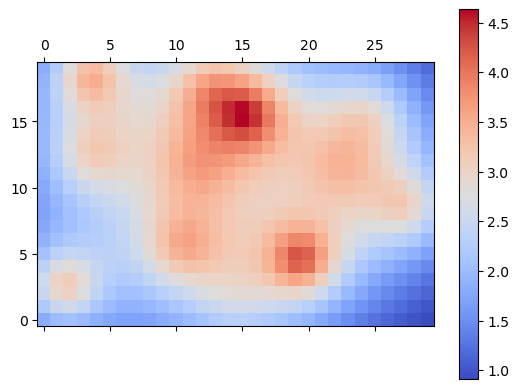

In [7]:

#Set light strength for all lamps to 20
xi = np.ones((12,1))*20

light_map = np.zeros(shape = (30, 20))
#The lighting from a lamp on a tile i given by xi*1/d_ij^2 where A = 1/d_ij^2
lighting = A @ xi
#Plotting our light_map with the the lighting information
for x in n:
    light_map[int(j[int(x)][0]), int(j[int(x)][1])] = lighting[int(x)]
    
fig, ax = plt.subplots()
im = (ax.matshow(light_map.T, cmap='coolwarm', origin='lower')) #Plotting the heatmap
fig.colorbar(im)


<h3>(c)</h3>

Brug den mindste kvadraters metode til at bestemme lystyrken for hver lampe saa at alle felternes belysning er saa taet paa 1 som muligt

i) Brug QR dekomponering ved brug af Forbedret gram schmidt

In [146]:
def forbedret_gram_schmidt(a):
    _, k = a.shape
    q = np.copy(a)
    r = np.zeros((k, k))
    for i in range(k):
        r[i, i] = np.linalg.norm(q[:, i])
        q[:, i] /= r[i, i]
        r[[i], i+1:] = q[:, [i]].T @ q[:, i+1:]
        q[:, i+1:] -= q[:, [i]] @ r[[i], i+1:]
    return q, r

def back_subs(r, c):
    _, n = r.shape
    x = np.empty((n, 1))
    for i in reversed(range(n)):
        x[i] = (c[i] - r[[i], i+1:] @ x[i+1:]) / r[i, i]
    return x



In [148]:
q, r = forbedret_gram_schmidt(A)
desired_b = np.ones(shape=(600,1))
c = q.T @ desired_b
x_back = back_subs(r, c)

x_back

array([[ 9.72995324],
       [ 6.59020799],
       [ 9.7631021 ],
       [ 4.71630177],
       [13.93604999],
       [ 4.95914888],
       [11.02673107],
       [ 3.77650334],
       [ 1.04416594],
       [ 3.34691325],
       [12.98248158],
       [ 6.63304103]])

ii) Brug SVD dekomponering

In [149]:
u, s, vt = np.linalg.svd(A, full_matrices=False)
x_svd = vt.T @ (np.diag(1/s)) @ (u.T @ desired_b)
x_svd

array([[ 9.72995324],
       [ 6.59020799],
       [ 9.7631021 ],
       [ 4.71630177],
       [13.93604999],
       [ 4.95914888],
       [11.02673107],
       [ 3.77650334],
       [ 1.04416594],
       [ 3.34691325],
       [12.98248158],
       [ 6.63304103]])

<h3>(d)</h3>

Lav heatmaps af resultaterne fra (c) og find den maksimalle afvigelse fra 1.

Foerst heatmap fra gram schmidt metoden

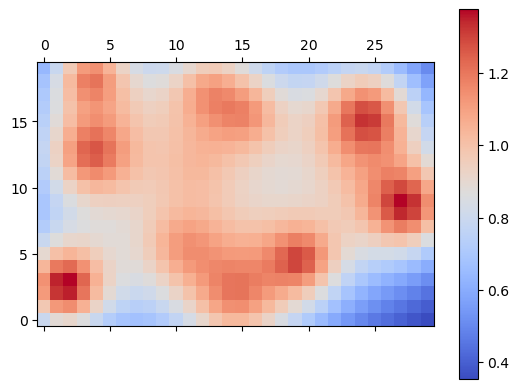

In [154]:
light_map2 = np.zeros(shape = (30, 20))
lighting2 = A @ x_back #x_back contains the light strengths we found, using gram schmidt
for x in n:
    light_map2[int(j[int(x)][0]), int(j[int(x)][1])] = lighting2[int(x)]
    
fig, ax = plt.subplots()
im = (ax.matshow(light_map2.T, cmap='coolwarm', origin='lower')) #Plotting the heatmap
fig.colorbar(im)

Nu laver vi heatmappet for svd metoden

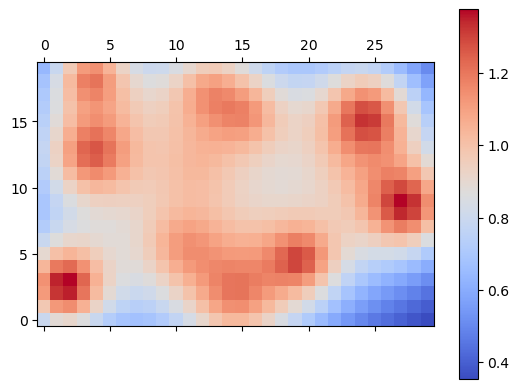

In [155]:
light_map3 = np.zeros(shape = (30, 20))
lighting3 = A @ x_svd #x_svd contains the light strength found using svd
for x in n:
    light_map3[int(j[int(x)][0]), int(j[int(x)][1])] = lighting3[int(x)]
    
fig, ax = plt.subplots()
im = (ax.matshow(light_map3.T, cmap='coolwarm', origin='lower')) #Plotting the heatmap
fig.colorbar(im)

De to heatmaps ser identiske ud saa vidt jeg kan se hvilket ogsaa giver mening siden de begge gav x vaerdier der lignede hindanden

Nu skal vi regne ud den maksimalle afvigelse fra 1, og se hvor stor forskel der er mellem de to metoders resultater

In [160]:
print(np.mean(1 - light_map2))
print(np.mean(1 - light_map3))

0.03288407560544574
0.0328840756054454


Den stoerste afvigelse var fra gram schmidt metoden med, 0.03288407560544574, men det var ogsaa kun med 0.34*10^-15 i forskel fra svd metoden

Saa her er der saadan set ingen forskel fra metoderne eftersom, vores resultater naesten er helt ens, der kan heller ikke ses nogen forskel paa heatmappet

<h3>(e)</h3>

Beregn tallene 𝜅(𝐴), cos 𝜃 og 𝜂.

Vi finder kappa_a cos_theta og eta, for brug af svd metoden, og derefter skal vi angive den tilsvarende øvre grænse for konditions-
tallet for hvordan ændring i 𝐴 påvirker ændring i den beregnede 𝑥 i del (c).
Og saa bruge dette til at forklare hvor nøjagtig vi kan forvente beregning af 𝑥 til at
være.

Jeg har her gjordt brug af metoderne beskrevet i notesaet 17

In [165]:
u, s, vt = np.linalg.svd(A, full_matrices=False)
kappa_a = s[0] / s[-1]
print('kappa_a =', kappa_a)

kappa_a = 7.495485563410548


In [167]:
proj_b = u @ (u.T @ desired_b)
cos_theta = np.linalg.norm(proj_b) / np.linalg.norm(b)
print('cos_theta =', np.degrees(np.arccos(cos_theta)))

cos_theta = 89.99717445986659


In [168]:
x = x_svd
eta = s[0] * np.linalg.norm(x) / np.linalg.norm(proj_b)
print('eta=', eta)

eta= 1.243018714435953


In [171]:
kond_x_b = kappa_a / (eta * cos_theta)
kond_x_a_højst = (kappa_a + (kappa_a**2 * np.sqrt(1-cos_theta**2) / (eta * cos_theta)))
print(f'{kond_x_b = :e}')
print(f'{kond_x_a_højst = :e}')


kond_x_b = 1.222766e+05
kond_x_a_højst = 9.165298e+05


Her har vi fundet den øvre grænse for konditions-tallet (kond_x_a_højst) som vi kan se er af en stoerrelse 10^5 som vi kan bruge til at finde ud af hvor stor en effekt aendringer i A har paa vores beregnede x fra (c)

In [177]:
print(f'{np.finfo(np.float32).eps * 10**5:e}')

1.192093e-02


Med svd metoden kan vi altsaa forvente et svar indenfor 10^-2 af det korrekte svar